<a href="https://colab.research.google.com/github/Shahi77/Assignment-Instance-based-Learning/blob/main/21DCS025_Assignment_Instance_based_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Step 1: Loading the data...
Dataset shape: (3249, 11)
  country           state       city                              station  \
0   India  Andhra_Pradesh  Amaravati       Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati       Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Anantapur         Gulzarpet, Anantapur - APPCB   
3   India  Andhra_Pradesh   Chittoor  Gangineni Cheruvu, Chittoor - APPCB   
4   India  Andhra_Pradesh     Kadapa      Yerramukkapalli, Kadapa - APPCB   

      last_update   latitude  longitude pollutant_id  pollutant_min  \
0  7/8/2024 11:00  16.515083  80.518167          NH3            2.0   
1  7/8/2024 11:00  16.515083  80.518167          SO2           21.0   
2  7/8/2024 11:00  14.675886  77.593027         PM10           58.0   
3  7/8/2024 11:00  13.204880  79.097889          NO2            7.0   
4  7/8/2024 11:00  14.465052  78.824187         PM10            NaN   

   pollutant_max  pollutant_avg  
0            4.0     

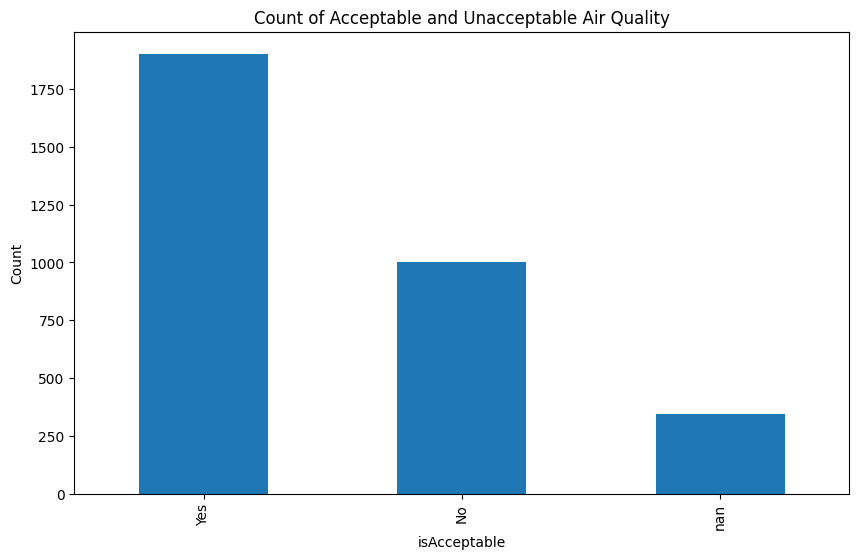


Step 4: Encoding categorical data...

Step 5: Preparing features and target...

Step 6: Splitting the data...

Step 7: Standardizing the features...

Step 8: Training the model


<ipython-input-4-0c7c111c52b8>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_nan.drop(columns=["last_update"], inplace=True)


Best k value: 4.

Step 9: Evaluating the model...

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       190
           1       0.99      0.96      0.98       391

    accuracy                           0.97       581
   macro avg       0.96      0.97      0.97       581
weighted avg       0.97      0.97      0.97       581


Confusion Matrix:


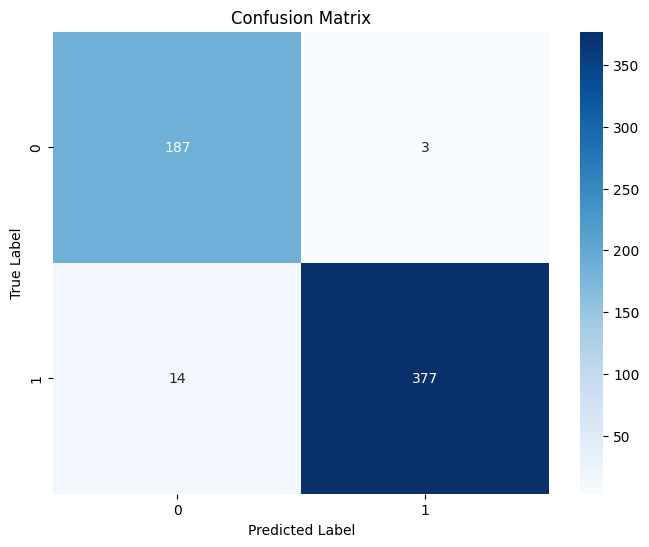


Accuracy: 0.9707
F1 Score: 0.9780
Best k value: 18

Analysis complete!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve

# Step 1: Load the data
print("\nStep 1: Loading the data...")
df = pd.read_csv('air_quality_data.csv')
print(f"Dataset shape: {df.shape}")
print(df.head())

# Step 2: Data Preprocessing
print("\nStep 2: Data Preprocessing...")
dangerous_thresholds = {
    "NO2": 25, "CO": 10, "NH3": 80, "OZONE": 20, "PM10": 30, "PM2.5": 65, "SO2": 50
}

for index, row in df.iterrows():
    if not np.isnan(row["pollutant_avg"]):
        isAcceptable = "No"
        if row["pollutant_avg"] < dangerous_thresholds[row["pollutant_id"]]:
            isAcceptable = "Yes"
        df.at[index, 'isAcceptable'] = isAcceptable

# Step 3: Visualize the data
print("\nStep 3: Visualizing data...")
plt.figure(figsize=(10, 6))
df['isAcceptable'].value_counts().plot(kind='bar')
plt.title('Count of Acceptable and Unacceptable Air Quality')
plt.xlabel('isAcceptable')
plt.ylabel('Count')
plt.show()


# Step 4: Remove NaN values and Encode categorical data
print("\nStep 4: Encoding categorical data...")
df_without_nan = df.dropna(subset=["pollutant_avg"])
df_without_nan.drop(columns=["last_update"], inplace=True)

encoder = OneHotEncoder()
encoded_pollutant_id = encoder.fit_transform(df_without_nan[['pollutant_id']])
encoded_df = pd.DataFrame(encoded_pollutant_id.toarray(), columns=encoder.get_feature_names_out(['pollutant_id']))

df_without_nan.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df_without_nan, encoded_df], axis=1)
df_encoded.drop(columns=["pollutant_id"], inplace=True)


# Step 5: Prepare the features and target
print("\nStep 5: Preparing features and target...")
label_encoder = LabelEncoder()
not_needed_columns = ["country", "state", "city", "station", "isAcceptable"]

X = df_encoded.drop(columns=not_needed_columns)
y = label_encoder.fit_transform(df_encoded["isAcceptable"])

# Step 6: Split the data
print("\nStep 6: Splitting the data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize the features
print("\nStep 7: Standardizing the features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: K-NN Model fitting
print("\nStep 8: Training the model")
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
print(f"Best k value: {best_k}.")

# Step 9: Making predictions and evaluating the model
print("\nStep 9: Evaluating the model...")
y_pred = best_knn.predict(X_test_scaled)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy and F1 Score
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

print("\nAnalysis complete!")
